# Random Forest

**Target Variable**
TREG (Ever Smoked regularly 1=yes and 0=no)
<br>_Have you ever smoked cigarettes regularly (1 per day for 30 days)?_

**Explanatry Variables**
<br><br>_Binary_
1. Biosex (1=male 0=female)
2. Hispanic
3. White
4. Black
5. American
6. Asian
7. Alcever1 (Ever drank Alcohol)
8. MARever1 (Ever used Marijuana)
9. Cocever1 (Ever used Cocain)
10. inhever1 (Ever used ihalants)
11. cigavail (Cigarettes available at home)
12. passist (either parent or public assistance)
13. expel1 (ever expelled)
<br><br> _Continuous_
14. Age 
15. ALCPROB1 (Alcohol Problem 0 to 6)
16. Deviant 1 (Deviant Beharvuour Scale)
17. VIOL1 (Violant behaviour scale)
18. DEP1 (depression scale)
19. ESTEEM1 (self esteem scale)
20. PARPRES1 (parental presence scale)
21. PARACT1 (parent activites scale)
22. FAMCONCT1 (family connectedness scale)
23. SCHCONN1 (school connectedness scale)
24. GPA1

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #This was cross_validation in earlier versions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn

## Loading the Dataset
The dataset is from _The National Longitudinal Study of Adolescent Health_ (AddHealth) is a representative school-based survey of adolescents in grades 7-12 in the United States. The Wave 1 survey focuses on factors that may influence adolescents’ health and risk behaviors, including personal traits, families, friendships, romantic relationships, peer groups, schools, neighborhoods, and communities. 

In [2]:
AH_data = pd.read_csv("../datasets/datasetfortree.csv")

### Checking first five rows of the data

In [3]:
AH_data.head()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,2,...,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0,...,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,0,...,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


* **Creating a cleaned dataset by dropping missing values**

In [4]:
data_clean = AH_data.dropna()

* **Looking at the descriptive Statistics of the cleaned data**

In [5]:
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


**Split into training and testing sets**

In [6]:
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN','age',
'ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1','ESTEEM1','VIOL1',
'PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV','PARPRES']]

In [7]:
targets = data_clean.TREG1

In [8]:
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

In [10]:
pred_train.shape

(2745, 24)

In [11]:
pred_test.shape

(1830, 24)

In [12]:
tar_train.shape

(2745,)

In [13]:
tar_test.shape

(1830,)

## Build model on training data

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
classifier=RandomForestClassifier(n_estimators=25)
#number of trees are 25 here

In [16]:
classifier=classifier.fit(pred_train,tar_train)

In [17]:
predictions=classifier.predict(pred_test)

In [18]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1433,   82],
       [ 192,  123]])

In [19]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8502732240437159

In [23]:
# fit an Extra Trees model to the data
model = sklearn.ensemble.ExtraTreesClassifier()
model.fit(pred_train,tar_train)

ExtraTreesClassifier()

## Printing Importance Scores

In [24]:
print(model.feature_importances_)

[0.02476423 0.01443416 0.02330899 0.01918435 0.00789041 0.00571594
 0.059499   0.04945842 0.04833371 0.1223357  0.01272729 0.01791716
 0.02968125 0.05856104 0.05716328 0.05063031 0.01810446 0.07087347
 0.06176505 0.07409624 0.01134785 0.05760414 0.05656498 0.04803859]


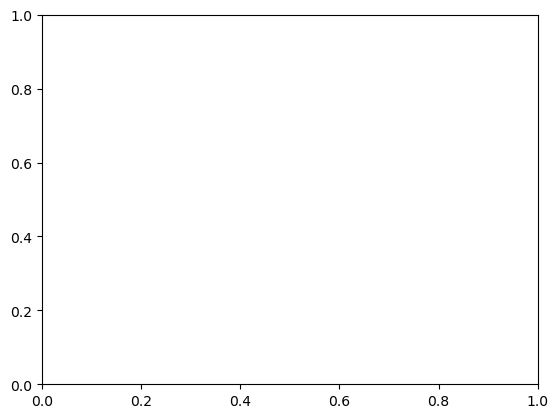

In [28]:
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()

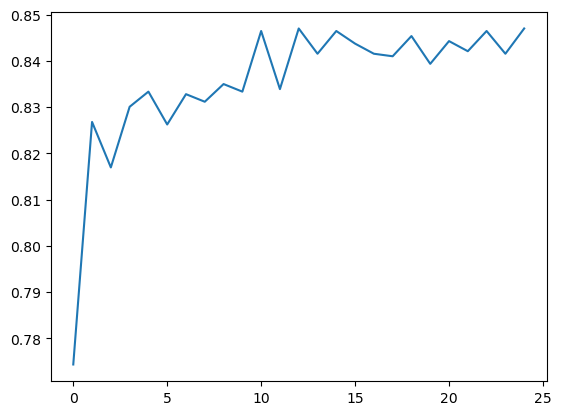

In [26]:
plt.plot(trees, accuracy)